In [73]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
import pandas as pd
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from nltk.tokenize.toktok import ToktokTokenizer
import nltk
from bs4 import BeautifulSoup
import re
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from wordcloud import WordCloud,STOPWORDS

In [77]:
df_train  = pd.read_csv('/home/rakesh/Downloads/archive/Train.csv')

In [78]:
df_train.shape

(40000, 2)

In [79]:
df_test = pd.read_csv('/home/rakesh/Downloads/archive/Test.csv')

In [80]:
df_test.shape

(5000, 2)

## Text normalization

In [81]:
#Tokenization of text
tokenizer=ToktokTokenizer()
#Setting English stopwords
stopword_list=nltk.corpus.stopwords.words('english')

## Removing html strips and noise text

In [82]:
#Removing the html strips
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

#Removing the noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    return text
#Apply function on review column
df_train['text']=df_train['text'].apply(denoise_text)

In [83]:
df_test['text']=df_test['text'].apply(denoise_text)

## Removing special characters

In [84]:
#Define function for removing special characters
def remove_special_characters(text, remove_digits=True):
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',text)
    return text
#Apply function on review column
df_train['text']=df_train['text'].apply(remove_special_characters)

In [85]:
df_test['text']=df_test['text'].apply(remove_special_characters)

## Text stemming

In [86]:
#Stemming the text
def simple_stemmer(text):
    ps=nltk.porter.PorterStemmer()
    text= ' '.join([ps.stem(word) for word in text.split()])
    return text
#Apply function on review column
#df_train['text']=df_train['text'].apply(simple_stemmer)

## Removing stopwords

In [87]:
#set stopwords to english
stop=set(stopwords.words('english'))
print(stop)

#removing the stopwords
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text
#Apply function on review column
df_train['text']=df_train['text'].apply(remove_stopwords)

{'have', 'here', 'doing', 'again', 'not', 'haven', 'why', 'until', 'him', "hadn't", 's', 've', "didn't", 'once', 'down', "isn't", 'his', 'they', 'from', "mustn't", 'wouldn', 'their', 'same', 'then', "couldn't", 'above', 'were', 'with', 'yourselves', "it's", 'against', 'most', 'or', 'only', 'myself', 'don', 'a', 'that', 're', 'you', "you'll", 'did', 'we', 'because', 'has', 'having', 'but', 'by', 'had', 'up', 'its', 'into', 'my', 'for', 'any', 'are', 'just', 'those', 'very', 'hasn', 'ma', 'does', "aren't", 'he', 'after', 'wasn', 'now', 'both', 'should', 'can', "shan't", "you've", 'at', 'below', 'the', 'aren', 'y', 'this', "that'll", 'me', "you're", 'll', 'hers', 'between', 'nor', 'i', 'theirs', 'whom', "mightn't", 'shan', 'which', 'is', 'will', 'am', 'while', 'ain', 'such', 'mightn', 'other', 'than', 'so', 'shouldn', 'each', 'mustn', "won't", 'being', 'she', 'couldn', 'on', "shouldn't", 'your', 'own', 'ourselves', 'these', 'how', 'ours', 'it', 'doesn', 'what', 'itself', 'over', 'weren', 

In [88]:
df_test['text']=df_test['text'].apply(remove_stopwords)

In [89]:
df_train['text'][5]

'terrible movie everyone said made laugh cameo appearance Scott McNealy giving award one murdered programmers front wall SUN logos McNealy CEO SUN Microsystem company practically defines hatred Microsoft instrumental filing antitrust complaints Microsoft silly enough think bad movie would add fuel fireTheres public record see SUNs involvement clearly makers movie know Scott McNealy interesting mystery'

In [90]:
cv =  CountVectorizer()

In [91]:
cv_train = cv.fit_transform(df_train['text'])
cv_train.shape

(40000, 192216)

In [92]:
cv_test = cv.transform(df_test['text'])
cv_test.shape

(5000, 192216)

In [93]:
tv = TfidfTransformer()

In [94]:
tv_train = tv.fit_transform(cv_train)
tv_train.shape

(40000, 192216)

In [95]:
tv_test = tv.transform(cv_test)
tv_test.shape

(5000, 192216)

In [96]:
train_sentiment = df_train['label']

In [97]:
mnb = MultinomialNB()

In [98]:
tfidf_mnb = mnb.fit(tv_train, train_sentiment.to_numpy())

In [99]:
predected = tfidf_mnb.predict(tv_test)

In [100]:
for line in predected:
    print(line)

0
0
0
1
0
1
0
0
0
0
0
1
0
0
0
0
0
1
1
1
1
0
1
1
0
1
1
1
0
0
1
0
1
1
0
1
0
1
1
1
0
0
1
0
1
1
0
0
1
0
1
1
0
1
1
1
1
1
0
0
1
0
0
1
1
1
0
0
0
1
0
1
0
1
0
0
1
1
1
1
0
1
1
0
0
1
1
0
0
0
0
1
0
0
1
0
0
1
0
0
0
1
1
0
1
1
0
0
0
1
0
0
0
1
1
0
0
0
0
1
1
0
0
0
1
1
1
0
0
0
0
0
0
1
1
1
1
0
0
1
1
0
0
0
0
0
0
0
0
0
1
1
0
1
1
1
0
0
0
0
1
1
0
0
0
0
1
0
0
1
1
0
1
0
1
0
1
0
0
0
1
0
0
1
0
0
1
1
1
0
1
0
0
0
1
0
1
1
0
1
0
1
0
0
1
1
0
1
1
1
1
1
1
1
0
0
0
1
0
0
0
1
1
0
0
0
0
1
1
1
0
1
1
1
1
1
1
0
0
1
0
1
1
1
0
1
1
0
1
1
0
1
0
1
1
1
0
1
0
1
1
0
1
1
0
1
0
0
1
1
1
1
1
1
1
0
1
0
1
0
1
0
0
0
0
1
1
1
0
0
1
1
1
1
1
0
0
1
1
0
0
0
0
1
0
1
0
0
1
1
0
0
0
1
0
1
1
1
1
0
0
1
0
1
0
1
0
0
1
1
0
0
0
1
0
0
0
0
0
0
0
1
0
1
1
0
1
0
0
1
0
1
1
0
0
1
0
1
1
0
0
1
1
1
1
0
1
1
0
0
1
1
0
0
1
0
0
0
1
1
1
0
0
1
1
0
0
0
0
0
1
0
0
0
1
0
1
0
0
1
0
1
1
1
0
0
1
1
0
1
1
1
1
1
0
1
0
1
0
0
1
0
1
0
0
1
1
0
1
1
0
0
0
0
1
0
1
1
0
0
0
1
0
1
0
1
1
1
0
0
1
0
0
0
1
1
0
1
1
1
1
1
0
0
0
1
0
0
0
0
0
0
1
0
0
0
1
1
1
1
1
0
0
1
0
0
0
1
0
1
0
1
1
1
1
1
0
0
0
1


1
0
1
0
0
0
0
1
0
0
0
0
1
0
1
0
0
0
0
1
1
0
0
1
0
0
0
1
1
0
0
0
0
0
1
1
1
0
1
1
0
0
1
1
0
1
1
1
1
1
0
1
1
1
0
0
1
0
1
0
0
0
1
1
0
1
0
0
1
1
0
1
0
0
0
1
1
1
0
1
0
0
1
1
1
0
0
1
0
1
1
0
0
1
1
1
0
1
0
0
1
1
1
0
0
1
0
1
0
1
0
1
0
0
1
0
1
0
0
1
0
1
1
1
1
0
0
1
1
0
0
0
0
0
0
0
1
0
1
0
0
0
1
0
0
0
0
0
0
1
1
1
0
1
1
1
0
0
1
0
1
1
1
0
0
1
1
1
1
1
0
1
1
0
0
0
1
1
0
1
0
0
0
1
0
0
0
1
0
0
1
1
0
0
0
1
1
0
0
1
0
0
0
1
0
1
0
1
1
0
1
0
1
0
1
0
1
0
0
1
0
1
1
1
0
1
1
0
1
0
1
0
0
1
1
1
0
0
1
1
0
0
0
1
1
1
0
1
0
1
1
0
1
0
1
1
1
0
0
1
1
0
1
1
1
1
0
0
1
1
0
0
0
1
1
1
0
0
1
1
0
1
0
1
0
0
0
1
1
1
1
0
1
1
0
0
0
1
0
1
0
1
1
1
0
0
0
0
1
0
0
0
0
1
0
0
1
0
0
1
0
0
1
0
1
0
0
0
1
1
0
1
0
1
1
0
0
1
1
1
1
1
0
0
1
1
1
1
0
1
0
0
1
0
0
1
1
0
0
1
0
0
1
1
1
0
1
1
0
1
0
0
1
0
0
1
0
0
0
0
0
0
1
1
0
1
1
0
1
1
0
1
0
0
0
0
1
0
0
1
0
1
0
0
0
1
0
0
0
0
1
1
1
1
1
1
1
0
1
1
1
1
0
1
0
0
1
1
1
0
1
1
1
1
1
0
1
1
1
0
1
1
0
1
1
1
1
0
1
1
0
1
1
1
0
0
1
1
1
1
0
0
0
1
0
1
1
1
0
0
1
1
1
1
0
0
1
1
1
1
0
0
0
0
1
1
0
0
0
0
0
1
0
0
0
1
0
0
0
1


In [101]:
df_test['text'][6]

'saw screening movie last night high expectations going definitely disappointed Within 5 minutes opening Williams already campaigning presidency becomes president first 40 minutes goes aspect movie first half hour hilarious Dont get wrong movie moments first half hour takes turn worst becomes less comedy thrillerdramalove storywhich pointless movie goes nowhere stands still good 30 minutes laughs interspersed consistently funny part beginning beginning one point biggest cheer heard audience person crowd yelled boooo confusingly emotional scene Williams gives great performance right par comedic style Walken also delivers strong supporting role think one character goes underrated Lewis Black Consistently vulgar political funny see tone PG13 rating Overall would pay see movie Afterall saw free even disappointed first half hour solid downhill really fitting category movie realizes half way anything onehour comedy central special 4510'

In [102]:
df_test['text'][6]

'saw screening movie last night high expectations going definitely disappointed Within 5 minutes opening Williams already campaigning presidency becomes president first 40 minutes goes aspect movie first half hour hilarious Dont get wrong movie moments first half hour takes turn worst becomes less comedy thrillerdramalove storywhich pointless movie goes nowhere stands still good 30 minutes laughs interspersed consistently funny part beginning beginning one point biggest cheer heard audience person crowd yelled boooo confusingly emotional scene Williams gives great performance right par comedic style Walken also delivers strong supporting role think one character goes underrated Lewis Black Consistently vulgar political funny see tone PG13 rating Overall would pay see movie Afterall saw free even disappointed first half hour solid downhill really fitting category movie realizes half way anything onehour comedy central special 4510'

In [103]:
print(accuracy_score(df_test.label, predected))

0.871


In [104]:
print(classification_report(df_test.label, predected, target_names=['pos','neg']))

              precision    recall  f1-score   support

         pos       0.86      0.88      0.87      2495
         neg       0.88      0.86      0.87      2505

    accuracy                           0.87      5000
   macro avg       0.87      0.87      0.87      5000
weighted avg       0.87      0.87      0.87      5000



In [105]:
df_train['text'][1]

'put movie DVD player sat coke chips expectations hoping movie would contain strongpoints first movie Awsome animation good flowing story excellent voice cast funny comedy kickass soundtrack disappointment found Atlantis Milos Return read reviews first might let following paragraph directed seen first movie enjoyed primarily points mentionedWhen first scene appears shock picked Atlantis Milos Return displaycase local videoshop whatever expectations music feels bad imitation first movie voice cast replaced fitting one exception characters like voice Sweet actual drawings isnt bad animation particular sad sight storyline also pretty weak like three episodes SchoobyDoo single adventurous story got last time dont misunderstand good SchoobyDoo episodes didnt laugh single time although might sniggered twiceTo audience havent seen first movie dont especially care similar sequel fast review movie standalone product liked schoobydoo might like movie didnt could still enjoy movie nothing else su

<function matplotlib.pyplot.show(close=None, block=None)>

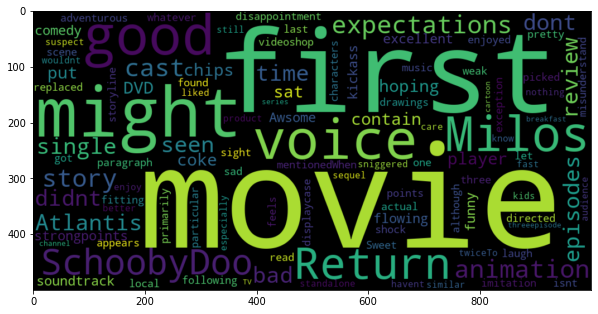

In [106]:
#word cloud for positive review words
plt.figure(figsize=(10,10))
positive_text=df_train['text'][1]
WC=WordCloud(width=1000,height=500,max_words=500,min_font_size=5)
positive_words=WC.generate(positive_text)
plt.imshow(positive_words,interpolation='bilinear')
plt.show